In [1]:
# importing numpy, pandas & matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

In [6]:
print('X.shape =', X.shape)
print('y.shape =', y.shape)

X.shape = (506, 13)
y.shape = (506,)


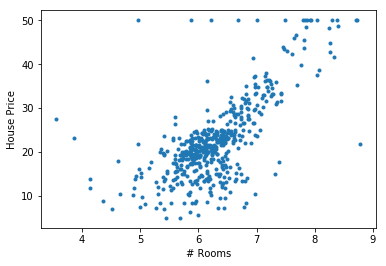

In [7]:
plt.scatter(X.RM, y, marker='.');
plt.xlabel('# Rooms');
plt.ylabel('House Price');

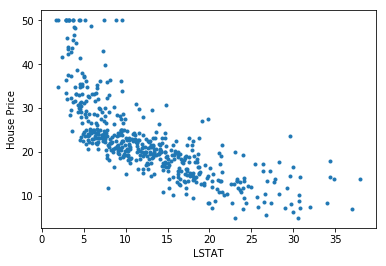

In [8]:
plt.scatter(X.LSTAT, y, marker='.');
plt.xlabel('LSTAT');
plt.ylabel('House Price');

### Train/Test Split

- In order to reguralize the model, we split the dataset into **training** and **test** sets.
- Training and test sets are similar in shape except in size.
- Usually training set is the bigger part of the dataset (e.g. 80%) and the rest is test set (e.g. 20%).

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.3)

In [10]:
print('X_train.shape =', X_train.shape)
print('X_test.shape =', X_test.shape)
print('y_train.shape =', y_train.shape)
print('y_test.shape =', y_test.shape)

X_train.shape = (354, 13)
X_test.shape = (152, 13)
y_train.shape = (354,)
y_test.shape = (152,)


### Feature Scaling

In [11]:
from sklearn import preprocessing

X_train = preprocessing.scale(X_train)
y_train = preprocessing.scale(y_train)
X_test = preprocessing.scale(X_test)
y_test = preprocessing.scale(y_test)

### training model on training set

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error
print('Mean squared error =', mean_squared_error(y_test, y_pred))

Mean squared error = 0.23398182650548308


In [15]:
print('Linear Regression score = %.2f%%' % (model.score(X_test, y_test) * 100))

Linear Regression score = 76.60%


In [16]:
model.coef_

array([-0.10857567,  0.09508797,  0.03893234,  0.07735953, -0.25575552,
        0.26096   ,  0.00161245, -0.32902499,  0.27064996, -0.18074467,
       -0.23884546,  0.08415283, -0.44099167])

In [17]:
model.intercept_

4.1659889657549334e-15